  ## By: Tien Duong


## Exploring Weather Trends
### Overview
As we all know that global temperature is getting warmer as ever. In this project,the data set was given to me as part of the [Udacity](https://classroom.udacity.com/nanodegrees/nd002/parts/93426fc7-0e68-4957-b16b-9fde38776c26/modules/e8455c07-092a-4b76-ba12-018cb53d0526/lessons/d551938c-d004-4801-a269-4b8dd784cc3b/concepts/530f21c0-2f37-4390-aaab-3ce440e56d80) program. The average temperature of global weather trends file is to be extracted from the `SQL` database. I extract the data and export its into two files `global weather.csv`and `local weather csv`. The global weather.csv consists of 2 columns, `year` and `avg_temp` which recorded the average temperage each years in Celsius. The local weather.csv contain 4 columns, `year`, `city`, `country`, `avg_temp`, which also recorded the average temperature in Celsius of San Jose which also known as `Silicon Valley`.

### Objective Overview
- Exacting data from the dataset by using SQL
- Using pandas for data manipulation
- Using matplotlib for data visualization
- Making observation by analyzing the visualization 

## SQL query used to extract the data from

### Query for extracting data from local weather trend dataframe.
SELECT * FROM city_data
WHERE city='San Jose'

### Query for extracting data from global weather trend dataframe.
SELECT * FROM global_data

In [1]:
# Importing pandas libary for data manipulation
# and matplotlib as for data visualization
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Global weather

In [2]:
# Import global temperature yearly average dataset
global_= pd.read_csv('project weather.csv')
global_.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [3]:
# Function to convert average temperature from Celcius to farenheit
def Fconverter(x):
    """Converting function formulor from Celcius to Farenheit"""
    return (x * 1.8) +32

In [4]:
# Set year as index and convert average temperature from celcius to farenheit
new_global = global_.set_index('year')
new_global['avg_temp'] = new_global['avg_temp'].apply(Fconverter)

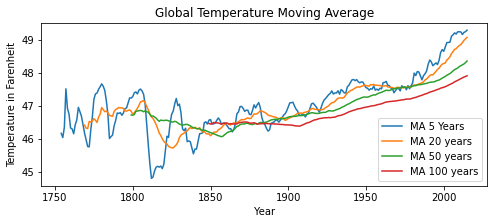

In [5]:
# Global Temperature moving average plot
plt.figure(figsize= [8,3])
plt.plot(new_global['avg_temp'].rolling(5).mean(), label='MA 5 Years');
plt.plot(new_global['avg_temp'].rolling(20).mean(), label= 'MA 20 years');
plt.plot(new_global['avg_temp'].rolling(50).mean(), label= 'MA 50 years');
plt.plot(new_global['avg_temp'].rolling(100).mean(), label= 'MA 100 years');

plt.legend(loc='best')
plt.title('Global Temperature Moving Average')
plt.xlabel(' Year ')
plt.ylabel('Temperature in Farenheit');

## Graph interpretaion
According to the graph, the average shift in temperature isnt't visually appear to be significant. But from the graph, we can see that the global temperature is steadily inclining. This can really show the insight of global warming, the earth is getting warmer. And to truly have real investigate further in the glimate changing, we must shift our focus onto the more relevant perspective. The average temperature in global weather still consider to be cooler from a personal perspective for a lot of us. For the next step, we'll analyze the weather average in my home town, Silicon Valley. 

## Local weather

In [6]:
# Import the local temperature average dataset
local_ = pd.read_csv('san_jose.csv')
local_.head()

,year,city,country,avg_temp
0,1849,San Jose,United States,14.12
1,1850,San Jose,United States,13.80
2,1851,San Jose,United States,14.39
3,1852,San Jose,United States,13.81
4,1853,San Jose,United States,14.40


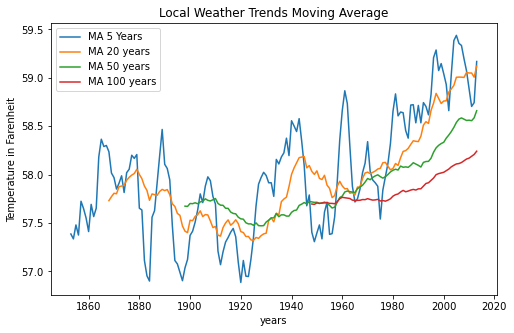

In [7]:
# Setting year as index and apply converter 
local_ = local_[['year', 'avg_temp']].set_index('year')
local_['avg_temp'] = local_['avg_temp'].apply(Fconverter)

# plotting the global weather trends moving average
plt.figure(figsize=[8,5])
plt.plot(local_['avg_temp'].rolling(5).mean(), label='MA 5 Years');
plt.plot(local_['avg_temp'].rolling(20).mean(), label= 'MA 20 years');
plt.plot(local_['avg_temp'].rolling(50).mean(), label= 'MA 50 years');
plt.plot(local_['avg_temp'].rolling(100).mean(), label= 'MA 100 years');

plt.title('Local Weather Trends Moving Average')
plt.xlabel('years')
plt.ylabel('Temperature in Farenheit')
plt.legend(loc='best');

### Correlation coefficient of average temperature between global and local weather trend
The correlation coefficient of average weather trends between global and Silicon Valley local weather is `0.54`. Yet the correlation coefficient value is significant enough between two variables but to truly measure how much one variable influences another is to square the R values which give us `0.29`. In term of prediction, we can determines that by observing the average local weather trends, we can make `29%` prediction the relationship from average global weather trends. Well that is not too promising but predicting weather is another field of study that is way out of this project scope of study.

In [8]:
# Use pandas built in method to find correlation
R = new_global['avg_temp'].corr(local_['avg_temp'])
R, R**2

(0.5360381430194767, 0.287336890771769)

### Visualization chart of global and Silicon Valley local weather trends average temperature
To truly satisfy our understanding of the average weather temperature between our two variables, I will be conducting a plot that visualize the steady trends. The plot will contain global and local average weather trends of moving average by 10. In term of compatibility, the local weather record of average temperature didn't recorded until the year 1849.

In [12]:
# First to check for the Dataset's shape
local_.shape, global_.shape

((165, 1), (266, 2))

In [13]:
# look like the local weather tracking system started in later and ended early
# We will modify this Dataset to fit into the other
edit_global = new_global.query('year >=1849 & 2013 >= year')
# Quick view comparison of the finalize glocal and local weather trends
edit_global.head(), local_.head()

(      avg_temp
 year          
 1849    46.364
 1850    46.220
 1851    46.724
 1852    46.580
 1853    46.472,
       avg_temp
 year          
 1849    57.416
 1850    56.840
 1851    57.902
 1852    56.858
 1853    57.920)

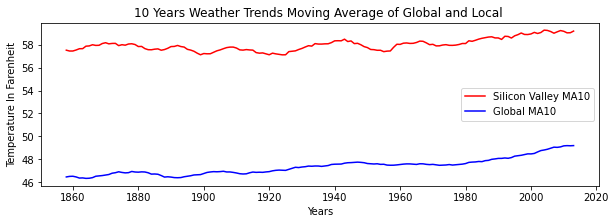

In [14]:
plt.figure(figsize=[10,3])
plt.plot(local_['avg_temp'].rolling(10).mean(), label='Silicon Valley MA10', color='red')
plt.plot(edit_global['avg_temp'].rolling(10).mean(), label='Global MA10', color='blue')
plt.legend(loc='best')

plt.title('10 Years Weather Trends Moving Average of Global and Local ')
plt.xlabel('Years')
plt.ylabel('Temperature In Farenheit');

## Conclusion
1. According to the graphs in this project shown that the steadily upward trends from both global and local weather temperatures.

2. There is correlation in the weather trends between Silicon valley and global temperature

3. The local average temperature is higher than global average temperature

4. GLOBAL WARMING IS HAPPENING